In [1]:
# coding:utf-8

In [2]:
import gc

import numpy as np
import pandas as pd

import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
# sns.set(font='IPAexGothic')

from IPython.display import display, Image
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)

In [3]:
!pwd

/Users/kenta_kasugai/competition/nishika_akutagawa/notebook


In [52]:
negaposi_sentence_split10 = pd.read_csv("../input/feature_negaposi_sentence_split10.csv", index_col=0)
negaposi_describe = pd.read_csv("../input/feature_negaposi_describe.csv", index_col=0)
word_count100_tfidf = pd.read_csv("../input/feature_word_count100_tfidf.csv", index_col=0)
word_count100 = pd.read_csv("../input/feature_word_count100.csv", index_col=0)
# word_0102 = pd.read_csv("../input/feature_word.csv", index_col=0)
katsuyo0 = pd.read_csv("../input/feature_katsuyo0.csv", index_col=0)
katsuyo01 = pd.read_csv("../input/feature_katsuyo01.csv", index_col=0)
adjective012 = pd.read_csv("../input/feature_adjective012.csv", index_col=0)
adjective01 = pd.read_csv("../input/feature_adjective01.csv", index_col=0)
adjective0 = pd.read_csv("../input/feature_adjective0.csv", index_col=0)
hyoki = pd.read_csv("../input/feature_hyoki.csv", index_col=0)

In [53]:
print(negaposi_sentence_split10.shape)
print(negaposi_describe.shape)
print(word_count100_tfidf.shape)
print(word_count100.shape)
# print(word_0102.shape)
print(katsuyo0.shape)
print(katsuyo01.shape)
print(adjective012.shape)
print(adjective01.shape)
print(adjective0.shape)
print(hyoki.shape)

(4396, 10)
(4732, 5)
(4732, 9502)
(4732, 9502)
(4732, 58)
(4732, 348)
(4732, 67)
(4732, 50)
(4732, 14)
(4732, 14)


In [54]:
data = pd.concat([negaposi_sentence_split10,
                  negaposi_describe,
                  word_count100_tfidf,
                  word_count100,
#                   word_0102,
                  katsuyo0,
                  katsuyo01,
                  adjective012,
                  adjective01,
                  adjective0,
                  hyoki,
                  ], axis=1)

In [55]:
data

,negaposi_split_0,negaposi_split_1,negaposi_split_2,negaposi_split_3,negaposi_split_4,negaposi_split_5,negaposi_split_6,negaposi_split_7,negaposi_split_8,negaposi_split_9,count,mean,std,min,max,ああ,あい,あいかわらず,あいさつ,あいだ,あいつ,あいにく,あいまい,あう,あか,あかい,あかり,あがる,あき,あきらか,あきらめ,あきらめる,あきる,あきれる,あく,あくどい,あくび,あくまで,あくまでも,あぐら,あける,あげく,あげる,あこがれ,あこがれる,あご,あさい,あさましい,あざ,あざやか,あし,あした,あす,あすこ,あずかる,あずける,あせる,あそこ,あそぶ,あたかも,あたし,あたたかい,あたら,あたり,あたりまえ,あたり前,あたる,あだな,あちこち,あちら,あっ,あっけ,あっさり,あっし,あっち,あつい,あつかう,あつまる,あつめる,あて,あてる,あと,あな,あながち,あなた,あに,あにい,あの,あはれ,あばれる,あびる,あふる,あふれる,あぶない,あぶる,あべこべ,あま,あまり,あまりに,あまる,...,名詞特殊助動詞語幹,名詞非自立一般,名詞非自立副詞可能,名詞非自立助動詞語幹,名詞非自立形容動詞語幹,形容詞接尾*,形容詞自立*,形容詞非自立*,感動詞**,接続詞**,接頭詞動詞接続*,接頭詞名詞接続*,接頭詞形容詞接続*,接頭詞数接続*,記号アルファベット*,記号一般*,記号句点*,記号括弧閉*,記号括弧開*,記号空白*,記号読点*,連体詞**,BOS/EOS*,その他間投,フィラー*,副詞一般,副詞助詞類接続,助動詞*,助詞並立助詞,助詞係助詞,助詞副助詞,助詞副助詞／並立助詞／終助詞,助詞副詞化,助詞接続助詞,助詞格助詞,助詞特殊,助詞終助詞,助詞連体化,動詞接尾,動詞自立,動詞非自立,名詞サ変接続,名詞ナイ形容詞語幹,名詞一般,名詞代名詞,名詞副詞可能,名詞動詞非自立的,名詞固有名詞,名詞引用文字列,名詞形容動詞語幹,名詞接尾,名詞接続詞的,名詞数,名詞特殊,名詞非自立,形容詞接尾,形容詞自立,形容詞非自立,感動詞*,接続詞*,接頭詞動詞接続,接頭詞名詞接続,接頭詞形容詞接続,接頭詞数接続,記号アルファベット,記号一般,記号句点,記号括弧閉,記号括弧開,記号空白,記号読点,連体詞*,BOS/EOS,その他,フィラー,副詞,助動詞,助詞,動詞,名詞,形容詞,感動詞,接続詞,接頭詞,記号,連体詞,letter_number,kanji,hiragana,katakana,digit,alphabet,old_kanji,old_hiragana,old,lowercase,hagyo,kakko,kagikakko,kutoten
0,-0.189030,-0.130570,-0.175781,-0.159920,-0.241814,-0.230414,-0.068126,-0.187654,-0.146884,-0.111569,14.0,-0.152729,0.053904,-0.241814,-0.068126,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033818,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0,15,1,1,0,1,6,1,0,3,0,0,0,0,0,12,14,4,4,6,24,6,2,0,4,4,3,44,1,22,3,0,1,13,55,0,0,22,2,42,8,15,1,56,12,2,0,5,0,7,6,0,0,0,17,1,6,1,0,3,0,0,0,0,0,12,14,4,4,6,24,6,2,0,4,7,44,117,52,121,8,0,3,0,64,6,651.0,0.298003,0.594470,0.036866,0.000000,0.000000,0.001536,0.000000,0.001536,0.007680,0.016897,0.000000,0.012289,0.058372
1,-0.112867,-0.149643,-0.163352,-0.187332,-0.184833,-0.069419,-0.144469,-0.173366,-0.115937,-0.085715,20.0,-0.138693,0.054466,-0.250899,-0.037045,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.082680,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0,17,14,4,1,0,17,0,2,7,0,11,0,0,0,7,20,7,7,3,87,18,2,0,1,12,6,69,13,38,8,5,5,31,122,0,1,48,4,84,5,15,0,144,18,13,0,19,0,10,23,0,5,0,36,0,17,0,2,7,0,11,0,0,0,7,20,7,7,3,87,18,2,0,1,18,69,271,93,283,17,2,7,11,131,18,1363.0,0.319883,0.562729,0.026412,0.000000,0.000000,0.000000,0.005136,0.005136,0.000000,0.037417,0.000000,0.010271,0.078503
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,-0.178221,0.108472,-0.259274,0.067481,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0

In [56]:
# del negaposi_sentence_split10, negaposi_describe, word_count100_tfidf, word_count100, word_0102, katsuyo0, katsuyo01, adjective012, adjective01, adjective0, hyoki
del negaposi_sentence_split10, negaposi_describe, word_count100_tfidf, word_count100, katsuyo0, katsuyo01, adjective012, adjective01, adjective0, hyoki
gc.collect()

15925

In [57]:
y = pd.read_csv("../input/target.csv", index_col=0, names=["target"])

In [58]:
y

,target
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
5,0.0
6,0.0
7,1.0
8,0.0
9,0.0


In [59]:
train_index = y[y["target"].notna()].index
test_index = y[y["target"].isna()].index

In [60]:
X_train_valid = data.iloc[train_index]
X_test = data.iloc[test_index]
y_train_valid = y.iloc[train_index]
y_train_valid = y_train_valid.astype(int)

In [61]:
del data, y
gc.collect()

246

# 学習・予測

In [14]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

### hold out

In [15]:
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3, random_state=0, stratify=y_train)
# col_name = X_valid.columns.values
# X_train.columns = range(X_train.shape[1])
# X_valid.columns = range(X_valid.shape[1])

In [16]:
# train = lgb.Dataset(X_train, label=y_train)
# valid = lgb.Dataset(X_valid, label=y_valid)

In [17]:
# params = {
#     'boosting_type':'gbdt', 
#     'objective':'binary',
#     "metric":"binary_logloss", 
#     'n_estimators':1000,
#     'random_state':0,
#     'learning_rate':[0.1],
#     'max_depth':[5], #3~9
#     "min_chlid_wight":[1], #1~5
#     'gamma':[0], #0~0.4
#     'colsample_bytree':[0.8], #
#     'subsamples':[0.8], #
#     'reg_alpha':[0], #
#     'reg_lambda':[1], #
# }

# model = lgb.train(params=params,
#                   train_set=train,
#                   valid_sets=[train, valid],
#                   num_boost_round=1000,
#                   early_stopping_rounds=50,
#                   verbose_eval=1,
#                  )

### grid search

In [62]:
col_name = X_train_valid.columns.values
X_train_valid.columns = range(X_train_valid.shape[1])

In [21]:
# https://www.kaggle.com/mlisovyi/lightgbm-hyperparameter-optimisation-lb-0-761

fit_params={
    "early_stopping_rounds":30,
    "eval_set" : [(X_train_valid, y_train_valid)],
    'eval_names': ['valid'],
    'verbose': 10
    }

param_grid ={
    'boosting_type':['gbdt'], 
    'objective':['binary'],
    "metric":["binary_logloss"], 
    'n_estimators':[10000],
    'random_state':[0],
    'learning_rate':[0.1],
    'max_depth':[3]#, 5, 7], #3~9
    "min_chlid_wight":[1]#, 3, 5], #1~5
    'gamma':[0], #0~0.4
    'colsample_bytree':[0.8],
    'subsamples':[0.8],
    'reg_alpha':[0]#, 0.1, 1],
    'reg_lambda':[1]#, 0.1, 0]
    }

clf = lgb.LGBMClassifier()

grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
#     cv=2,
    cv=StratifiedKFold(n_splits=4, random_state=0, shuffle=True),
    scoring='f1',
    refit=True,
    verbose=3
    )

grid_search.fit(X_train_valid, y_train_valid, **fit_params)

print("\n"+"*"*50)
print('Best score reached: {} with params: {} '.format(grid_search.best_score_, grid_search.best_params_))
print("*"*50)

Fitting 4 folds for each of 81 candidates, totalling 324 fits
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, metric=binary_logloss, min_chlid_wight=1, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=1, subsamples=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.105073
[20]	valid's binary_logloss: 0.0634969
[30]	valid's binary_logloss: 0.043598
[40]	valid's binary_logloss: 0.0325657
[50]	valid's binary_logloss: 0.0259775
[60]	valid's binary_logloss: 0.0216568
[70]	valid's binary_logloss: 0.0183566
[80]	valid's binary_logloss: 0.0160596
[90]	valid's binary_logloss: 0.014584
[100]	valid's binary_logloss: 0.0135308
[110]	valid's binary_logloss: 0.0127343
[120]	valid's binary_logloss: 0.0122699
[130]	valid's binary_logloss: 0.0118449
[140]	valid's binary_logloss: 0.0114971
[150]	valid's binary_logloss: 0.0112897
[160]	valid's binary_logloss: 0.0110799
[170]	valid's binary_logloss: 0.0109311
[180]	valid's binary_logloss: 0.0107706
[190]	valid's binary_logloss: 0.0105952
[200]	valid's binary_logloss: 0.0106606
[210]	valid's binary_logloss: 0.0106479
[220]	valid's binary_logloss: 0.0106011
[230]	valid's binary_logloss: 0.0105393
[240]	valid's binary_logloss: 0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.108514
[20]	valid's binary_logloss: 0.0659098
[30]	valid's binary_logloss: 0.0466444
[40]	valid's binary_logloss: 0.0354487
[50]	valid's binary_logloss: 0.0282533
[60]	valid's binary_logloss: 0.0237543
[70]	valid's binary_logloss: 0.0200102
[80]	valid's binary_logloss: 0.0172922
[90]	valid's binary_logloss: 0.0154309
[100]	valid's binary_logloss: 0.0141211
[110]	valid's binary_logloss: 0.0129775
[120]	valid's binary_logloss: 0.0121296
[130]	valid's binary_logloss: 0.0116095
[140]	valid's binary_logloss: 0.0112809
[150]	valid's binary_logloss: 0.0108221
[160]	valid's binary_logloss: 0.0105229
[170]	valid's binary_logloss: 0.0102484
[180]	valid's binary_logloss: 0.0101004
[190]	valid's binary_logloss: 0.00992344
[200]	valid's binary_logloss: 0.00991031
[210]	valid's binary_logloss: 0.00984618
[220]	valid's binary_logloss: 0.0097944
[230]	valid's binary_logloss: 0.00977616
[240]	valid's binary_logl

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 111.9min remaining:    0.0s


Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.108911
[20]	valid's binary_logloss: 0.0668806
[30]	valid's binary_logloss: 0.0465771
[40]	valid's binary_logloss: 0.0353627
[50]	valid's binary_logloss: 0.0280265
[60]	valid's binary_logloss: 0.0235674
[70]	valid's binary_logloss: 0.0201826
[80]	valid's binary_logloss: 0.0178578
[90]	valid's binary_logloss: 0.0165988
[100]	valid's binary_logloss: 0.0155225
[110]	valid's binary_logloss: 0.0147456
[120]	valid's binary_logloss: 0.014327
[130]	valid's binary_logloss: 0.0139162
[140]	valid's binary_logloss: 0.0138116
[150]	valid's binary_logloss: 0.0136314
[160]	valid's binary_logloss: 0.013631
[170]	valid's binary_logloss: 0.0136222
[180]	valid's binary_logloss: 0.0136329
[190]	valid's binary_logloss: 0.0136771
[200]	valid's binary_logloss: 0.0137022
Early stopping, best iteration is:
[173]	valid's binary_logloss: 0.0135902
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, 

[170]	valid's binary_logloss: 0.00919612
[180]	valid's binary_logloss: 0.0091831
[190]	valid's binary_logloss: 0.00918958
[200]	valid's binary_logloss: 0.00915935
[210]	valid's binary_logloss: 0.00913588
[220]	valid's binary_logloss: 0.00916788
[230]	valid's binary_logloss: 0.0092328
Early stopping, best iteration is:
[203]	valid's binary_logloss: 0.00907183
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, metric=binary_logloss, min_chlid_wight=1, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=0.1, subsamples=0.8, score=0.9137931034482758, total=  46.7s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, metric=binary_logloss, min_chlid_wight=1, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=0, subsamples=0.8 
Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.103311
[20]	valid's binary_logloss: 0.0624206
[30]

[30]	valid's binary_logloss: 0.0475331
[40]	valid's binary_logloss: 0.0361981
[50]	valid's binary_logloss: 0.0291257
[60]	valid's binary_logloss: 0.0242729
[70]	valid's binary_logloss: 0.021108
[80]	valid's binary_logloss: 0.0181725
[90]	valid's binary_logloss: 0.0159832
[100]	valid's binary_logloss: 0.0146482
[110]	valid's binary_logloss: 0.0134766
[120]	valid's binary_logloss: 0.0125574
[130]	valid's binary_logloss: 0.0119916
[140]	valid's binary_logloss: 0.0114239
[150]	valid's binary_logloss: 0.0110395
[160]	valid's binary_logloss: 0.0108293
[170]	valid's binary_logloss: 0.0105654
[180]	valid's binary_logloss: 0.0103841
[190]	valid's binary_logloss: 0.0102782
[200]	valid's binary_logloss: 0.0101514
[210]	valid's binary_logloss: 0.00996005
[220]	valid's binary_logloss: 0.00986726
[230]	valid's binary_logloss: 0.00974528
[240]	valid's binary_logloss: 0.00974271
[250]	valid's binary_logloss: 0.00967982
[260]	valid's binary_logloss: 0.00959037
[270]	valid's binary_logloss: 0.00947986
[

[60]	valid's binary_logloss: 0.0221975
[70]	valid's binary_logloss: 0.0190747
[80]	valid's binary_logloss: 0.0172067
[90]	valid's binary_logloss: 0.0152815
[100]	valid's binary_logloss: 0.0139322
[110]	valid's binary_logloss: 0.0129463
[120]	valid's binary_logloss: 0.0120926
[130]	valid's binary_logloss: 0.011658
[140]	valid's binary_logloss: 0.0112719
[150]	valid's binary_logloss: 0.0110219
[160]	valid's binary_logloss: 0.0107245
[170]	valid's binary_logloss: 0.0105287
[180]	valid's binary_logloss: 0.0105008
[190]	valid's binary_logloss: 0.0103936
[200]	valid's binary_logloss: 0.0103401
[210]	valid's binary_logloss: 0.0103094
[220]	valid's binary_logloss: 0.0102439
[230]	valid's binary_logloss: 0.0102136
[240]	valid's binary_logloss: 0.0101844
[250]	valid's binary_logloss: 0.0101786
[260]	valid's binary_logloss: 0.0101786
Early stopping, best iteration is:
[238]	valid's binary_logloss: 0.0101567
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, m

Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.103784
[20]	valid's binary_logloss: 0.0628516
[30]	valid's binary_logloss: 0.0433051
[40]	valid's binary_logloss: 0.0311816
[50]	valid's binary_logloss: 0.0243108
[60]	valid's binary_logloss: 0.0197721
[70]	valid's binary_logloss: 0.0165249
[80]	valid's binary_logloss: 0.0144207
[90]	valid's binary_logloss: 0.0128558
[100]	valid's binary_logloss: 0.0116563
[110]	valid's binary_logloss: 0.010876
[120]	valid's binary_logloss: 0.0104144
[130]	valid's binary_logloss: 0.00985106
[140]	valid's binary_logloss: 0.00935447
[150]	valid's binary_logloss: 0.00898322
[160]	valid's binary_logloss: 0.00878228
[170]	valid's binary_logloss: 0.00858587
[180]	valid's binary_logloss: 0.00861058
[190]	valid's binary_logloss: 0.00858813
[200]	valid's binary_logloss: 0.00858622
[210]	valid's binary_logloss: 0.00849273
[220]	valid's binary_logloss: 0.00853743
[230]	valid's binary_logloss: 0.00854105
Early stopping, bes

Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.107846
[20]	valid's binary_logloss: 0.0657116
[30]	valid's binary_logloss: 0.0464698
[40]	valid's binary_logloss: 0.0357557
[50]	valid's binary_logloss: 0.0293894
[60]	valid's binary_logloss: 0.0243697
[70]	valid's binary_logloss: 0.0207867
[80]	valid's binary_logloss: 0.0184801
[90]	valid's binary_logloss: 0.0167337
[100]	valid's binary_logloss: 0.0154642
[110]	valid's binary_logloss: 0.0144626
[120]	valid's binary_logloss: 0.0136353
[130]	valid's binary_logloss: 0.0131235
[140]	valid's binary_logloss: 0.0128886
[150]	valid's binary_logloss: 0.0128628
[160]	valid's binary_logloss: 0.0128628
[170]	valid's binary_logloss: 0.0128628
Early stopping, best iteration is:
[141]	valid's binary_logloss: 0.0128613
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, metric=binary_logloss, min_chlid_wight=1, n_estimators=10000, objective=binary, random_state=0, reg_alpha

[140]	valid's binary_logloss: 0.01204
[150]	valid's binary_logloss: 0.01204
[160]	valid's binary_logloss: 0.01204
Early stopping, best iteration is:
[139]	valid's binary_logloss: 0.01204
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, metric=binary_logloss, min_chlid_wight=1, n_estimators=10000, objective=binary, random_state=0, reg_alpha=1, reg_lambda=0, subsamples=0.8, score=0.9137931034482758, total=  43.7s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=1, subsamples=0.8 
Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.105073
[20]	valid's binary_logloss: 0.0634969
[30]	valid's binary_logloss: 0.043598
[40]	valid's binary_logloss: 0.0325657
[50]	valid's binary_logloss: 0.0259775
[60]	valid's binary_logloss: 0.0216568
[70]	valid's binary_loglo

[130]	valid's binary_logloss: 0.0118424
[140]	valid's binary_logloss: 0.0115534
[150]	valid's binary_logloss: 0.0114087
[160]	valid's binary_logloss: 0.0114295
[170]	valid's binary_logloss: 0.0114933
Early stopping, best iteration is:
[146]	valid's binary_logloss: 0.0113581
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=0.1, subsamples=0.8, score=0.9152542372881356, total=  44.4s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=0.1, subsamples=0.8 
Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.104828
[20]	valid's binary_logloss: 0.0619801
[30]	valid's binary_logloss: 0.042355
[40]	valid's binary_logloss: 0.0317094
[50]	valid'

[50]	valid's binary_logloss: 0.0258487
[60]	valid's binary_logloss: 0.0219757
[70]	valid's binary_logloss: 0.0192139
[80]	valid's binary_logloss: 0.0170575
[90]	valid's binary_logloss: 0.0155943
[100]	valid's binary_logloss: 0.0146334
[110]	valid's binary_logloss: 0.0140324
[120]	valid's binary_logloss: 0.0136262
[130]	valid's binary_logloss: 0.0135501
[140]	valid's binary_logloss: 0.0136438
[150]	valid's binary_logloss: 0.0137461
[160]	valid's binary_logloss: 0.0140524
Early stopping, best iteration is:
[132]	valid's binary_logloss: 0.0135288
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=0, subsamples=0.8, score=0.9043478260869565, total=  44.1s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binary, random_state=0

Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.109522
[20]	valid's binary_logloss: 0.0671603
[30]	valid's binary_logloss: 0.0474713
[40]	valid's binary_logloss: 0.0342015
[50]	valid's binary_logloss: 0.0272037
[60]	valid's binary_logloss: 0.0219822
[70]	valid's binary_logloss: 0.0183311
[80]	valid's binary_logloss: 0.0159279
[90]	valid's binary_logloss: 0.0138834
[100]	valid's binary_logloss: 0.012629
[110]	valid's binary_logloss: 0.0115336
[120]	valid's binary_logloss: 0.0108353
[130]	valid's binary_logloss: 0.0102461
[140]	valid's binary_logloss: 0.00976592
[150]	valid's binary_logloss: 0.00940867
[160]	valid's binary_logloss: 0.00918258
[170]	valid's binary_logloss: 0.00898923
[180]	valid's binary_logloss: 0.00877394
[190]	valid's binary_logloss: 0.00856944
[200]	valid's binary_logloss: 0.00846448
[210]	valid's binary_logloss: 0.008384
[220]	valid's binary_logloss: 0.00828709
[230]	valid's binary_logloss: 0.00825024
[240]	valid's binary_l

Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.103867
[20]	valid's binary_logloss: 0.0621888
[30]	valid's binary_logloss: 0.0421255
[40]	valid's binary_logloss: 0.0313438
[50]	valid's binary_logloss: 0.0249743
[60]	valid's binary_logloss: 0.0207917
[70]	valid's binary_logloss: 0.0180242
[80]	valid's binary_logloss: 0.0156794
[90]	valid's binary_logloss: 0.0141928
[100]	valid's binary_logloss: 0.0130816
[110]	valid's binary_logloss: 0.0122489
[120]	valid's binary_logloss: 0.011709
[130]	valid's binary_logloss: 0.0112775
[140]	valid's binary_logloss: 0.0112097
[150]	valid's binary_logloss: 0.0111554
[160]	valid's binary_logloss: 0.0109929
[170]	valid's binary_logloss: 0.0110387
[180]	valid's binary_logloss: 0.0110157
[190]	valid's binary_logloss: 0.011198
[200]	valid's binary_logloss: 0.0111097
Early stopping, best iteration is:
[174]	valid's binary_logloss: 0.0109535
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, 

Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.110583
[20]	valid's binary_logloss: 0.0687046
[30]	valid's binary_logloss: 0.0497556
[40]	valid's binary_logloss: 0.0381143
[50]	valid's binary_logloss: 0.0311464
[60]	valid's binary_logloss: 0.0265839
[70]	valid's binary_logloss: 0.0236219
[80]	valid's binary_logloss: 0.0214025
[90]	valid's binary_logloss: 0.0196905
[100]	valid's binary_logloss: 0.018568
[110]	valid's binary_logloss: 0.0177502
[120]	valid's binary_logloss: 0.0170255
[130]	valid's binary_logloss: 0.0166075
[140]	valid's binary_logloss: 0.0162486
[150]	valid's binary_logloss: 0.0160535
[160]	valid's binary_logloss: 0.0158476
[170]	valid's binary_logloss: 0.0158476
[180]	valid's binary_logloss: 0.0158476
Early stopping, best iteration is:
[158]	valid's binary_logloss: 0.0158472
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, obje

[80]	valid's binary_logloss: 0.0179621
[90]	valid's binary_logloss: 0.0161029
[100]	valid's binary_logloss: 0.0149027
[110]	valid's binary_logloss: 0.0140906
[120]	valid's binary_logloss: 0.0133135
[130]	valid's binary_logloss: 0.012903
[140]	valid's binary_logloss: 0.012645
[150]	valid's binary_logloss: 0.012645
[160]	valid's binary_logloss: 0.012645
Early stopping, best iteration is:
[137]	valid's binary_logloss: 0.01263
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binary, random_state=0, reg_alpha=1, reg_lambda=0, subsamples=0.8, score=0.9322033898305084, total=  42.1s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binary, random_state=0, reg_alpha=1, reg_lambda=0, subsamples=0.8 
Training until validation scores don't improve for 30 rounds
[10]	valid's bina

Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.108911
[20]	valid's binary_logloss: 0.0668806
[30]	valid's binary_logloss: 0.0465771
[40]	valid's binary_logloss: 0.0353627
[50]	valid's binary_logloss: 0.0280265
[60]	valid's binary_logloss: 0.0235674
[70]	valid's binary_logloss: 0.0201826
[80]	valid's binary_logloss: 0.0178578
[90]	valid's binary_logloss: 0.0165988
[100]	valid's binary_logloss: 0.0155225
[110]	valid's binary_logloss: 0.0147456
[120]	valid's binary_logloss: 0.014327
[130]	valid's binary_logloss: 0.0139162
[140]	valid's binary_logloss: 0.0138116
[150]	valid's binary_logloss: 0.0136314
[160]	valid's binary_logloss: 0.013631
[170]	valid's binary_logloss: 0.0136222
[180]	valid's binary_logloss: 0.0136329
[190]	valid's binary_logloss: 0.0136771
[200]	valid's binary_logloss: 0.0137022
Early stopping, best iteration is:
[173]	valid's binary_logloss: 0.0135902
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, 

[170]	valid's binary_logloss: 0.00919612
[180]	valid's binary_logloss: 0.0091831
[190]	valid's binary_logloss: 0.00918958
[200]	valid's binary_logloss: 0.00915935
[210]	valid's binary_logloss: 0.00913588
[220]	valid's binary_logloss: 0.00916788
[230]	valid's binary_logloss: 0.0092328
Early stopping, best iteration is:
[203]	valid's binary_logloss: 0.00907183
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, metric=binary_logloss, min_chlid_wight=5, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=0.1, subsamples=0.8, score=0.9137931034482758, total=  46.5s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, metric=binary_logloss, min_chlid_wight=5, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=0, subsamples=0.8 
Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.103311
[20]	valid's binary_logloss: 0.0624206
[30]

[30]	valid's binary_logloss: 0.0475331
[40]	valid's binary_logloss: 0.0361981
[50]	valid's binary_logloss: 0.0291257
[60]	valid's binary_logloss: 0.0242729
[70]	valid's binary_logloss: 0.021108
[80]	valid's binary_logloss: 0.0181725
[90]	valid's binary_logloss: 0.0159832
[100]	valid's binary_logloss: 0.0146482
[110]	valid's binary_logloss: 0.0134766
[120]	valid's binary_logloss: 0.0125574
[130]	valid's binary_logloss: 0.0119916
[140]	valid's binary_logloss: 0.0114239
[150]	valid's binary_logloss: 0.0110395
[160]	valid's binary_logloss: 0.0108293
[170]	valid's binary_logloss: 0.0105654
[180]	valid's binary_logloss: 0.0103841
[190]	valid's binary_logloss: 0.0102782
[200]	valid's binary_logloss: 0.0101514
[210]	valid's binary_logloss: 0.00996005
[220]	valid's binary_logloss: 0.00986726
[230]	valid's binary_logloss: 0.00974528
[240]	valid's binary_logloss: 0.00974271
[250]	valid's binary_logloss: 0.00967982
[260]	valid's binary_logloss: 0.00959037
[270]	valid's binary_logloss: 0.00947986
[

[60]	valid's binary_logloss: 0.0221975
[70]	valid's binary_logloss: 0.0190747
[80]	valid's binary_logloss: 0.0172067
[90]	valid's binary_logloss: 0.0152815
[100]	valid's binary_logloss: 0.0139322
[110]	valid's binary_logloss: 0.0129463
[120]	valid's binary_logloss: 0.0120926
[130]	valid's binary_logloss: 0.011658
[140]	valid's binary_logloss: 0.0112719
[150]	valid's binary_logloss: 0.0110219
[160]	valid's binary_logloss: 0.0107245
[170]	valid's binary_logloss: 0.0105287
[180]	valid's binary_logloss: 0.0105008
[190]	valid's binary_logloss: 0.0103936
[200]	valid's binary_logloss: 0.0103401
[210]	valid's binary_logloss: 0.0103094
[220]	valid's binary_logloss: 0.0102439
[230]	valid's binary_logloss: 0.0102136
[240]	valid's binary_logloss: 0.0101844
[250]	valid's binary_logloss: 0.0101786
[260]	valid's binary_logloss: 0.0101786
Early stopping, best iteration is:
[238]	valid's binary_logloss: 0.0101567
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, m

Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.103784
[20]	valid's binary_logloss: 0.0628516
[30]	valid's binary_logloss: 0.0433051
[40]	valid's binary_logloss: 0.0311816
[50]	valid's binary_logloss: 0.0243108
[60]	valid's binary_logloss: 0.0197721
[70]	valid's binary_logloss: 0.0165249
[80]	valid's binary_logloss: 0.0144207
[90]	valid's binary_logloss: 0.0128558
[100]	valid's binary_logloss: 0.0116563
[110]	valid's binary_logloss: 0.010876
[120]	valid's binary_logloss: 0.0104144
[130]	valid's binary_logloss: 0.00985106
[140]	valid's binary_logloss: 0.00935447
[150]	valid's binary_logloss: 0.00898322
[160]	valid's binary_logloss: 0.00878228
[170]	valid's binary_logloss: 0.00858587
[180]	valid's binary_logloss: 0.00861058
[190]	valid's binary_logloss: 0.00858813
[200]	valid's binary_logloss: 0.00858622
[210]	valid's binary_logloss: 0.00849273
[220]	valid's binary_logloss: 0.00853743
[230]	valid's binary_logloss: 0.00854105
Early stopping, bes

Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.107846
[20]	valid's binary_logloss: 0.0657116
[30]	valid's binary_logloss: 0.0464698
[40]	valid's binary_logloss: 0.0357557
[50]	valid's binary_logloss: 0.0293894
[60]	valid's binary_logloss: 0.0243697
[70]	valid's binary_logloss: 0.0207867
[80]	valid's binary_logloss: 0.0184801
[90]	valid's binary_logloss: 0.0167337
[100]	valid's binary_logloss: 0.0154642
[110]	valid's binary_logloss: 0.0144626
[120]	valid's binary_logloss: 0.0136353
[130]	valid's binary_logloss: 0.0131235
[140]	valid's binary_logloss: 0.0128886
[150]	valid's binary_logloss: 0.0128628
[160]	valid's binary_logloss: 0.0128628
[170]	valid's binary_logloss: 0.0128628
Early stopping, best iteration is:
[141]	valid's binary_logloss: 0.0128613
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, metric=binary_logloss, min_chlid_wight=5, n_estimators=10000, objective=binary, random_state=0, reg_alpha

[140]	valid's binary_logloss: 0.01204
[150]	valid's binary_logloss: 0.01204
[160]	valid's binary_logloss: 0.01204
[170]	valid's binary_logloss: 0.01204
Early stopping, best iteration is:
[140]	valid's binary_logloss: 0.01204
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, metric=binary_logloss, min_chlid_wight=5, n_estimators=10000, objective=binary, random_state=0, reg_alpha=1, reg_lambda=0, subsamples=0.8, score=0.9137931034482758, total=  42.9s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=1, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=1, subsamples=0.8 
Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.0932861
[20]	valid's binary_logloss: 0.0494427
[30]	valid's binary_logloss: 0.030484
[40]	valid's binary_logloss: 0.0215331
[50]	valid's binary_logloss: 0.0168609
[60]	valid's binary_loglo

Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.0917121
[20]	valid's binary_logloss: 0.0489891
[30]	valid's binary_logloss: 0.0305924
[40]	valid's binary_logloss: 0.0225551
[50]	valid's binary_logloss: 0.0179916
[60]	valid's binary_logloss: 0.015685
[70]	valid's binary_logloss: 0.0147658
[80]	valid's binary_logloss: 0.014674
[90]	valid's binary_logloss: 0.0147104
[100]	valid's binary_logloss: 0.0147717
[110]	valid's binary_logloss: 0.0151304
Early stopping, best iteration is:
[84]	valid's binary_logloss: 0.0146255
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=1, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=0.1, subsamples=0.8, score=0.9137931034482758, total=  44.3s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=1, n_estimators=10000, objective=binary

[50]	valid's binary_logloss: 0.0179217
[60]	valid's binary_logloss: 0.0151909
[70]	valid's binary_logloss: 0.0136189
[80]	valid's binary_logloss: 0.0126355
[90]	valid's binary_logloss: 0.0119766
[100]	valid's binary_logloss: 0.011525
[110]	valid's binary_logloss: 0.0113012
[120]	valid's binary_logloss: 0.0109943
[130]	valid's binary_logloss: 0.010832
[140]	valid's binary_logloss: 0.0106638
[150]	valid's binary_logloss: 0.0106097
[160]	valid's binary_logloss: 0.010593
[170]	valid's binary_logloss: 0.0105199
[180]	valid's binary_logloss: 0.0105059
[190]	valid's binary_logloss: 0.0104609
[200]	valid's binary_logloss: 0.0103981
[210]	valid's binary_logloss: 0.0103406
[220]	valid's binary_logloss: 0.0102811
[230]	valid's binary_logloss: 0.0102539
[240]	valid's binary_logloss: 0.0102355
[250]	valid's binary_logloss: 0.0102003
[260]	valid's binary_logloss: 0.0101717
[270]	valid's binary_logloss: 0.0101537
[280]	valid's binary_logloss: 0.0101574
[290]	valid's binary_logloss: 0.0101574
[300]	va

Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.0895059
[20]	valid's binary_logloss: 0.0474749
[30]	valid's binary_logloss: 0.0296643
[40]	valid's binary_logloss: 0.0204995
[50]	valid's binary_logloss: 0.0159638
[60]	valid's binary_logloss: 0.0134468
[70]	valid's binary_logloss: 0.0121038
[80]	valid's binary_logloss: 0.0112485
[90]	valid's binary_logloss: 0.0107695
[100]	valid's binary_logloss: 0.0106069
[110]	valid's binary_logloss: 0.0104948
[120]	valid's binary_logloss: 0.0106048
[130]	valid's binary_logloss: 0.010454
[140]	valid's binary_logloss: 0.0104387
[150]	valid's binary_logloss: 0.0104325
[160]	valid's binary_logloss: 0.0104325
Early stopping, best iteration is:
[135]	valid's binary_logloss: 0.0104233
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=1, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0.1, reg_lambda=0.1, subsamples=0.8, sc

Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.0994751
[20]	valid's binary_logloss: 0.0560104
[30]	valid's binary_logloss: 0.0373047
[40]	valid's binary_logloss: 0.0276327
[50]	valid's binary_logloss: 0.0225099
[60]	valid's binary_logloss: 0.0198617
[70]	valid's binary_logloss: 0.0178898
[80]	valid's binary_logloss: 0.016894
[90]	valid's binary_logloss: 0.0161831
[100]	valid's binary_logloss: 0.0159072
[110]	valid's binary_logloss: 0.0157341
[120]	valid's binary_logloss: 0.0157448
[130]	valid's binary_logloss: 0.0157448
[140]	valid's binary_logloss: 0.0157448
Early stopping, best iteration is:
[114]	valid's binary_logloss: 0.0157327
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=1, n_estimators=10000, objective=binary, random_state=0, reg_alpha=1, reg_lambda=1, subsamples=0.8, score=0.8849557522123894, total=  39.8s
[CV] boosting_type=gbdt, colsample_bytree=0.8,

[90]	valid's binary_logloss: 0.0144171
[100]	valid's binary_logloss: 0.0143845
[110]	valid's binary_logloss: 0.0143845
[120]	valid's binary_logloss: 0.0143845
Early stopping, best iteration is:
[92]	valid's binary_logloss: 0.0143784
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=1, n_estimators=10000, objective=binary, random_state=0, reg_alpha=1, reg_lambda=0, subsamples=0.8, score=0.8869565217391304, total=  39.3s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=1, n_estimators=10000, objective=binary, random_state=0, reg_alpha=1, reg_lambda=0, subsamples=0.8 
Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.0940942
[20]	valid's binary_logloss: 0.0516834
[30]	valid's binary_logloss: 0.0342663
[40]	valid's binary_logloss: 0.0258426
[50]	valid's binary_logloss: 0.0214021
[60]	valid's bin

Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.0892818
[20]	valid's binary_logloss: 0.046298
[30]	valid's binary_logloss: 0.0280209
[40]	valid's binary_logloss: 0.0193231
[50]	valid's binary_logloss: 0.0150211
[60]	valid's binary_logloss: 0.0129917
[70]	valid's binary_logloss: 0.0119025
[80]	valid's binary_logloss: 0.0114321
[90]	valid's binary_logloss: 0.0113186
[100]	valid's binary_logloss: 0.0114139
[110]	valid's binary_logloss: 0.0115949
Early stopping, best iteration is:
[85]	valid's binary_logloss: 0.0112269
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=0.1, subsamples=0.8, score=0.9137931034482758, total=  54.9s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binar

[120]	valid's binary_logloss: 0.0112557
Early stopping, best iteration is:
[95]	valid's binary_logloss: 0.01095
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=0, subsamples=0.8, score=0.9043478260869565, total=  47.0s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0.1, reg_lambda=1, subsamples=0.8 
Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.0937044
[20]	valid's binary_logloss: 0.0497217
[30]	valid's binary_logloss: 0.030912
[40]	valid's binary_logloss: 0.0217292
[50]	valid's binary_logloss: 0.0169949
[60]	valid's binary_logloss: 0.0145588
[70]	valid's binary_logloss: 0.0128792
[80]	valid's binary_logloss: 0.0121728
[90]	valid's binary

[30]	valid's binary_logloss: 0.0289609
[40]	valid's binary_logloss: 0.020937
[50]	valid's binary_logloss: 0.0164452
[60]	valid's binary_logloss: 0.0141998
[70]	valid's binary_logloss: 0.0126585
[80]	valid's binary_logloss: 0.0120905
[90]	valid's binary_logloss: 0.0115252
[100]	valid's binary_logloss: 0.0112103
[110]	valid's binary_logloss: 0.0109107
[120]	valid's binary_logloss: 0.0108825
[130]	valid's binary_logloss: 0.0108354
[140]	valid's binary_logloss: 0.010798
[150]	valid's binary_logloss: 0.0107995
[160]	valid's binary_logloss: 0.0107995
Early stopping, best iteration is:
[139]	valid's binary_logloss: 0.0107729
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0.1, reg_lambda=0.1, subsamples=0.8, score=0.9411764705882353, total=  56.3s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_

[20]	valid's binary_logloss: 0.0532205
[30]	valid's binary_logloss: 0.0342323
[40]	valid's binary_logloss: 0.0253504
[50]	valid's binary_logloss: 0.0203567
[60]	valid's binary_logloss: 0.0174739
[70]	valid's binary_logloss: 0.0153818
[80]	valid's binary_logloss: 0.0142184
[90]	valid's binary_logloss: 0.0134061
[100]	valid's binary_logloss: 0.0129318
[110]	valid's binary_logloss: 0.0128083
[120]	valid's binary_logloss: 0.0128083
[130]	valid's binary_logloss: 0.0128083
Early stopping, best iteration is:
[106]	valid's binary_logloss: 0.0128083
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binary, random_state=0, reg_alpha=1, reg_lambda=1, subsamples=0.8, score=0.923076923076923, total= 1.6min
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binary, random_state=0, re

[90]	valid's binary_logloss: 0.0125328
[100]	valid's binary_logloss: 0.0125415
[110]	valid's binary_logloss: 0.0125415
[120]	valid's binary_logloss: 0.0125415
Early stopping, best iteration is:
[90]	valid's binary_logloss: 0.0125328
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binary, random_state=0, reg_alpha=1, reg_lambda=0.1, subsamples=0.8, score=0.8869565217391304, total= 1.7min
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binary, random_state=0, reg_alpha=1, reg_lambda=0, subsamples=0.8 
Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.0907469
[20]	valid's binary_logloss: 0.0497535
[30]	valid's binary_logloss: 0.0309537
[40]	valid's binary_logloss: 0.0228444
[50]	valid's binary_logloss: 0.0184286
[60]	valid's b

[80]	valid's binary_logloss: 0.0152615
[90]	valid's binary_logloss: 0.0149374
[100]	valid's binary_logloss: 0.0148011
[110]	valid's binary_logloss: 0.01468
[120]	valid's binary_logloss: 0.014623
[130]	valid's binary_logloss: 0.0146829
[140]	valid's binary_logloss: 0.014762
Early stopping, best iteration is:
[112]	valid's binary_logloss: 0.0146224
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=5, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=1, subsamples=0.8, score=0.9043478260869565, total=  45.8s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=5, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=1, subsamples=0.8 
Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.0928242
[20]	valid's binary_logloss: 0.0505185
[30]	valid's bina

[30]	valid's binary_logloss: 0.0286364
[40]	valid's binary_logloss: 0.0197203
[50]	valid's binary_logloss: 0.0155504
[60]	valid's binary_logloss: 0.0132114
[70]	valid's binary_logloss: 0.0121348
[80]	valid's binary_logloss: 0.0113077
[90]	valid's binary_logloss: 0.0108484
[100]	valid's binary_logloss: 0.0109067
[110]	valid's binary_logloss: 0.011098
[120]	valid's binary_logloss: 0.0115504
Early stopping, best iteration is:
[98]	valid's binary_logloss: 0.0107769
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=5, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=0, subsamples=0.8, score=0.9322033898305084, total=  48.2s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=5, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=0, subsamples=0.8 
Training until validation scores don't 

[150]	valid's binary_logloss: 0.0104619
[160]	valid's binary_logloss: 0.010387
[170]	valid's binary_logloss: 0.0104418
[180]	valid's binary_logloss: 0.0103515
[190]	valid's binary_logloss: 0.0102759
[200]	valid's binary_logloss: 0.0102188
[210]	valid's binary_logloss: 0.0101652
[220]	valid's binary_logloss: 0.0101382
[230]	valid's binary_logloss: 0.0101466
[240]	valid's binary_logloss: 0.0100996
[250]	valid's binary_logloss: 0.010081
[260]	valid's binary_logloss: 0.010083
[270]	valid's binary_logloss: 0.0100519
[280]	valid's binary_logloss: 0.010055
[290]	valid's binary_logloss: 0.0100552
Early stopping, best iteration is:
[267]	valid's binary_logloss: 0.0100369
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=5, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0.1, reg_lambda=1, subsamples=0.8, score=0.9043478260869565, total=  50.7s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, lea

Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.0917201
[20]	valid's binary_logloss: 0.049831
[30]	valid's binary_logloss: 0.0309396
[40]	valid's binary_logloss: 0.0227365
[50]	valid's binary_logloss: 0.0184573
[60]	valid's binary_logloss: 0.0163485
[70]	valid's binary_logloss: 0.0154468
[80]	valid's binary_logloss: 0.0150323
[90]	valid's binary_logloss: 0.0148628
[100]	valid's binary_logloss: 0.0147125
[110]	valid's binary_logloss: 0.0149581
[120]	valid's binary_logloss: 0.0150126
Early stopping, best iteration is:
[94]	valid's binary_logloss: 0.0146756
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=5, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0.1, reg_lambda=0, subsamples=0.8, score=0.8849557522123894, total=  42.9s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wigh

[30]	valid's binary_logloss: 0.0328199
[40]	valid's binary_logloss: 0.0243927
[50]	valid's binary_logloss: 0.0199319
[60]	valid's binary_logloss: 0.0172986
[70]	valid's binary_logloss: 0.0156947
[80]	valid's binary_logloss: 0.0147481
[90]	valid's binary_logloss: 0.014129
[100]	valid's binary_logloss: 0.0140889
[110]	valid's binary_logloss: 0.014089
[120]	valid's binary_logloss: 0.0140891
Early stopping, best iteration is:
[92]	valid's binary_logloss: 0.0140888
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=5, n_estimators=10000, objective=binary, random_state=0, reg_alpha=1, reg_lambda=0.1, subsamples=0.8, score=0.923076923076923, total=  40.7s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, metric=binary_logloss, min_chlid_wight=5, n_estimators=10000, objective=binary, random_state=0, reg_alpha=1, reg_lambda=0.1, subsamples=0.8 
Training until validation scores don'

[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=1, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=1, subsamples=0.8, score=0.923076923076923, total=  47.3s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=1, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=1, subsamples=0.8 
Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.0905412
[20]	valid's binary_logloss: 0.0476732
[30]	valid's binary_logloss: 0.0292013
[40]	valid's binary_logloss: 0.0208274
[50]	valid's binary_logloss: 0.0167288
[60]	valid's binary_logloss: 0.0145599
[70]	valid's binary_logloss: 0.0131728
[80]	valid's binary_logloss: 0.0124028
[90]	valid's binary_logloss: 0.0117249
[100]	valid's binary_logloss: 0.0114134
[110]	valid's binary_logloss: 0.0112565
[120]	valid's 

[120]	valid's binary_logloss: 0.0117257
[130]	valid's binary_logloss: 0.0117293
Early stopping, best iteration is:
[108]	valid's binary_logloss: 0.0113975
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=1, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=0.1, subsamples=0.8, score=0.9137931034482758, total=  44.6s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=1, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=0, subsamples=0.8 
Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.0834715
[20]	valid's binary_logloss: 0.0417063
[30]	valid's binary_logloss: 0.0244881
[40]	valid's binary_logloss: 0.0177994
[50]	valid's binary_logloss: 0.0141877
[60]	valid's binary_logloss: 0.0130341
[70]	valid's binary_logloss: 0.0128096
[80]	valid's b

[60]	valid's binary_logloss: 0.0171661
[70]	valid's binary_logloss: 0.0158644
[80]	valid's binary_logloss: 0.0152075
[90]	valid's binary_logloss: 0.014913
[100]	valid's binary_logloss: 0.0145757
[110]	valid's binary_logloss: 0.0145939
[120]	valid's binary_logloss: 0.0144382
[130]	valid's binary_logloss: 0.0143724
[140]	valid's binary_logloss: 0.0144224
[150]	valid's binary_logloss: 0.0144928
[160]	valid's binary_logloss: 0.0144941
Early stopping, best iteration is:
[132]	valid's binary_logloss: 0.0143572
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=1, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0.1, reg_lambda=1, subsamples=0.8, score=0.8849557522123894, total=  44.6s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=1, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0.1, reg_lambda=1, subsamp

Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.0849533
[20]	valid's binary_logloss: 0.0435513
[30]	valid's binary_logloss: 0.0260779
[40]	valid's binary_logloss: 0.0186028
[50]	valid's binary_logloss: 0.0146363
[60]	valid's binary_logloss: 0.0129619
[70]	valid's binary_logloss: 0.0119355
[80]	valid's binary_logloss: 0.0115934
[90]	valid's binary_logloss: 0.011314
[100]	valid's binary_logloss: 0.0111198
[110]	valid's binary_logloss: 0.0109898
[120]	valid's binary_logloss: 0.0109662
[130]	valid's binary_logloss: 0.0109662
[140]	valid's binary_logloss: 0.0109662
Early stopping, best iteration is:
[113]	valid's binary_logloss: 0.0109625
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=1, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0.1, reg_lambda=0, subsamples=0.8, score=0.9322033898305084, total=  42.0s
[CV] boosting_type=gbdt, colsample_bytree=0.

[100]	valid's binary_logloss: 0.0135003
[110]	valid's binary_logloss: 0.0135003
Early stopping, best iteration is:
[83]	valid's binary_logloss: 0.0135003
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=1, n_estimators=10000, objective=binary, random_state=0, reg_alpha=1, reg_lambda=0.1, subsamples=0.8, score=0.9137931034482758, total=  41.8s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=1, n_estimators=10000, objective=binary, random_state=0, reg_alpha=1, reg_lambda=0.1, subsamples=0.8 
Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.0887689
[20]	valid's binary_logloss: 0.0477637
[30]	valid's binary_logloss: 0.0306707
[40]	valid's binary_logloss: 0.022432
[50]	valid's binary_logloss: 0.0181257
[60]	valid's binary_logloss: 0.0158996
[70]	valid's binary_logloss: 0.0146343
[80]	valid's b

[30]	valid's binary_logloss: 0.0302641
[40]	valid's binary_logloss: 0.021978
[50]	valid's binary_logloss: 0.017818
[60]	valid's binary_logloss: 0.01534
[70]	valid's binary_logloss: 0.0140562
[80]	valid's binary_logloss: 0.013508
[90]	valid's binary_logloss: 0.0134456
[100]	valid's binary_logloss: 0.0134456
[110]	valid's binary_logloss: 0.0134456
Early stopping, best iteration is:
[82]	valid's binary_logloss: 0.0134456
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=1, n_estimators=10000, objective=binary, random_state=0, reg_alpha=1, reg_lambda=0, subsamples=0.8, score=0.8965517241379309, total=  39.5s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=1, subsamples=0.8 
Training until validation scores don't improve for 30 rounds
[10]	valid's binary_lo

Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.0879699
[20]	valid's binary_logloss: 0.0453921
[30]	valid's binary_logloss: 0.0278318
[40]	valid's binary_logloss: 0.0201702
[50]	valid's binary_logloss: 0.0165578
[60]	valid's binary_logloss: 0.0152823
[70]	valid's binary_logloss: 0.0151035
[80]	valid's binary_logloss: 0.0150943
[90]	valid's binary_logloss: 0.0152781
[100]	valid's binary_logloss: 0.0153488
Early stopping, best iteration is:
[72]	valid's binary_logloss: 0.0149445
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=0.1, subsamples=0.8, score=0.9137931034482758, total=  42.1s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lam

[110]	valid's binary_logloss: 0.0112605
[120]	valid's binary_logloss: 0.0111153
[130]	valid's binary_logloss: 0.0109413
[140]	valid's binary_logloss: 0.01093
[150]	valid's binary_logloss: 0.0108383
[160]	valid's binary_logloss: 0.0108004
[170]	valid's binary_logloss: 0.0107396
[180]	valid's binary_logloss: 0.0106689
[190]	valid's binary_logloss: 0.0106213
[200]	valid's binary_logloss: 0.0106156
[210]	valid's binary_logloss: 0.0105958
[220]	valid's binary_logloss: 0.0105621
[230]	valid's binary_logloss: 0.0105604
[240]	valid's binary_logloss: 0.0105447
[250]	valid's binary_logloss: 0.0105127
[260]	valid's binary_logloss: 0.0105127
[270]	valid's binary_logloss: 0.0105127
Early stopping, best iteration is:
[248]	valid's binary_logloss: 0.0105099
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0.1, reg_lambda=1, subsamples=0.8, score=0.932203389

[100]	valid's binary_logloss: 0.0109658
[110]	valid's binary_logloss: 0.010855
[120]	valid's binary_logloss: 0.0107756
[130]	valid's binary_logloss: 0.0107253
[140]	valid's binary_logloss: 0.0107253
[150]	valid's binary_logloss: 0.0107253
Early stopping, best iteration is:
[127]	valid's binary_logloss: 0.0106984
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0.1, reg_lambda=0.1, subsamples=0.8, score=0.9137931034482758, total=  42.8s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0.1, reg_lambda=0, subsamples=0.8 
Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.0838315
[20]	valid's binary_logloss: 0.042557
[30]	valid's binary_logloss: 0.0249705
[40]	val

[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binary, random_state=0, reg_alpha=1, reg_lambda=1, subsamples=0.8, score=0.8771929824561403, total=  40.6s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=3, n_estimators=10000, objective=binary, random_state=0, reg_alpha=1, reg_lambda=1, subsamples=0.8 
Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.0919924
[20]	valid's binary_logloss: 0.0517817
[30]	valid's binary_logloss: 0.0336756
[40]	valid's binary_logloss: 0.0241727
[50]	valid's binary_logloss: 0.0193574
[60]	valid's binary_logloss: 0.0164406
[70]	valid's binary_logloss: 0.014844
[80]	valid's binary_logloss: 0.013768
[90]	valid's binary_logloss: 0.013006
[100]	valid's binary_logloss: 0.0127354
[110]	valid's binary_logloss: 0.0127354
[120]	valid's bi

Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.091305
[20]	valid's binary_logloss: 0.0492385
[30]	valid's binary_logloss: 0.0320496
[40]	valid's binary_logloss: 0.0241505
[50]	valid's binary_logloss: 0.020099
[60]	valid's binary_logloss: 0.0180573
[70]	valid's binary_logloss: 0.0166324
[80]	valid's binary_logloss: 0.0163265
[90]	valid's binary_logloss: 0.0162928
[100]	valid's binary_logloss: 0.0162928
[110]	valid's binary_logloss: 0.0162928
[120]	valid's binary_logloss: 0.0162928
[130]	valid's binary_logloss: 0.0162928
[140]	valid's binary_logloss: 0.0162928
[150]	valid's binary_logloss: 0.0162928
[160]	valid's binary_logloss: 0.0162928
[170]	valid's binary_logloss: 0.0162928
[180]	valid's binary_logloss: 0.0162928
[190]	valid's binary_logloss: 0.0162928
[200]	valid's binary_logloss: 0.0162928
[210]	valid's binary_logloss: 0.0162928
[220]	valid's binary_logloss: 0.0162928
Early stopping, best iteration is:
[199]	valid's binary_logloss: 0.016

[90]	valid's binary_logloss: 0.0122927
Early stopping, best iteration is:
[68]	valid's binary_logloss: 0.0121991
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=5, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=0.1, subsamples=0.8, score=0.9137931034482758, total=  42.6s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=5, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0, reg_lambda=0.1, subsamples=0.8 
Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.0849737
[20]	valid's binary_logloss: 0.0430953
[30]	valid's binary_logloss: 0.0257685
[40]	valid's binary_logloss: 0.0177347
[50]	valid's binary_logloss: 0.0141035
[60]	valid's binary_logloss: 0.012563
[70]	valid's binary_logloss: 0.0118777
[80]	valid's binary_logloss: 0.0116199
[90]	valid's bin

[40]	valid's binary_logloss: 0.0208599
[50]	valid's binary_logloss: 0.0167901
[60]	valid's binary_logloss: 0.0144905
[70]	valid's binary_logloss: 0.0133122
[80]	valid's binary_logloss: 0.0125234
[90]	valid's binary_logloss: 0.0121318
[100]	valid's binary_logloss: 0.0116658
[110]	valid's binary_logloss: 0.0115074
[120]	valid's binary_logloss: 0.0113263
[130]	valid's binary_logloss: 0.0111896
[140]	valid's binary_logloss: 0.0111483
[150]	valid's binary_logloss: 0.0111203
[160]	valid's binary_logloss: 0.0110874
[170]	valid's binary_logloss: 0.011101
[180]	valid's binary_logloss: 0.0110481
[190]	valid's binary_logloss: 0.0110583
[200]	valid's binary_logloss: 0.0110485
[210]	valid's binary_logloss: 0.011064
Early stopping, best iteration is:
[188]	valid's binary_logloss: 0.0109916
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=5, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0.1, reg_lambda=1,

Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.0879067
[20]	valid's binary_logloss: 0.0448043
[30]	valid's binary_logloss: 0.0278625
[40]	valid's binary_logloss: 0.020418
[50]	valid's binary_logloss: 0.0171633
[60]	valid's binary_logloss: 0.0156697
[70]	valid's binary_logloss: 0.0149287
[80]	valid's binary_logloss: 0.0147985
[90]	valid's binary_logloss: 0.0147491
[100]	valid's binary_logloss: 0.014687
[110]	valid's binary_logloss: 0.0147198
[120]	valid's binary_logloss: 0.0147442
[130]	valid's binary_logloss: 0.0148063
[140]	valid's binary_logloss: 0.0148199
Early stopping, best iteration is:
[117]	valid's binary_logloss: 0.0146661
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=5, n_estimators=10000, objective=binary, random_state=0, reg_alpha=0.1, reg_lambda=0.1, subsamples=0.8, score=0.9043478260869565, total=  43.2s
[CV] boosting_type=gbdt, colsample_bytree=0

[20]	valid's binary_logloss: 0.0512704
[30]	valid's binary_logloss: 0.0329636
[40]	valid's binary_logloss: 0.0243384
[50]	valid's binary_logloss: 0.0198861
[60]	valid's binary_logloss: 0.0170384
[70]	valid's binary_logloss: 0.0154478
[80]	valid's binary_logloss: 0.0143562
[90]	valid's binary_logloss: 0.0137016
[100]	valid's binary_logloss: 0.0133228
[110]	valid's binary_logloss: 0.0133198
[120]	valid's binary_logloss: 0.0133198
Early stopping, best iteration is:
[99]	valid's binary_logloss: 0.0133119
[CV]  boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=5, n_estimators=10000, objective=binary, random_state=0, reg_alpha=1, reg_lambda=1, subsamples=0.8, score=0.9043478260869565, total=  40.3s
[CV] boosting_type=gbdt, colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, metric=binary_logloss, min_chlid_wight=5, n_estimators=10000, objective=binary, random_state=0, reg_alpha=1, reg_lambda=1, subsamples=0.8 

Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.0899668
[20]	valid's binary_logloss: 0.0478572
[30]	valid's binary_logloss: 0.0308534
[40]	valid's binary_logloss: 0.0226537
[50]	valid's binary_logloss: 0.018144
[60]	valid's binary_logloss: 0.0159567
[70]	valid's binary_logloss: 0.0147391
[80]	valid's binary_logloss: 0.0140867
[90]	valid's binary_logloss: 0.0140331
[100]	valid's binary_logloss: 0.014031
[110]	valid's binary_logloss: 0.01403
[120]	valid's binary_logloss: 0.0140294
[130]	valid's binary_logloss: 0.0140292
[140]	valid's binary_logloss: 0.0140291
[150]	valid's binary_logloss: 0.0140291
[160]	valid's binary_logloss: 0.0140291
[170]	valid's binary_logloss: 0.0140291
[180]	valid's binary_logloss: 0.0140291
[190]	valid's binary_logloss: 0.014029
[200]	valid's binary_logloss: 0.014029
[210]	valid's binary_logloss: 0.014029
[220]	valid's binary_logloss: 0.014029
[230]	valid's binary_logloss: 0.014029
[240]	valid's binary_logloss: 0.01402

[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed: 416.1min finished


Training until validation scores don't improve for 30 rounds
[10]	valid's binary_logloss: 0.105314
[20]	valid's binary_logloss: 0.0631555
[30]	valid's binary_logloss: 0.0422966
[40]	valid's binary_logloss: 0.0299846
[50]	valid's binary_logloss: 0.0227428
[60]	valid's binary_logloss: 0.0178151
[70]	valid's binary_logloss: 0.0141128
[80]	valid's binary_logloss: 0.0113684
[90]	valid's binary_logloss: 0.00897569
[100]	valid's binary_logloss: 0.00718457
[110]	valid's binary_logloss: 0.00587878
[120]	valid's binary_logloss: 0.00479114
[130]	valid's binary_logloss: 0.00398992
[140]	valid's binary_logloss: 0.00333816
[150]	valid's binary_logloss: 0.00285184
[160]	valid's binary_logloss: 0.00244191
[170]	valid's binary_logloss: 0.00212321
[180]	valid's binary_logloss: 0.00184287
[190]	valid's binary_logloss: 0.00160712
[200]	valid's binary_logloss: 0.00143025
[210]	valid's binary_logloss: 0.00127051
[220]	valid's binary_logloss: 0.0011393
[230]	valid's binary_logloss: 0.00103483
[240]	valid's b

[1940]	valid's binary_logloss: 3.73686e-05
[1950]	valid's binary_logloss: 3.71621e-05
[1960]	valid's binary_logloss: 3.69379e-05
[1970]	valid's binary_logloss: 3.67233e-05
[1980]	valid's binary_logloss: 3.65079e-05
[1990]	valid's binary_logloss: 3.62929e-05
[2000]	valid's binary_logloss: 3.60868e-05
[2010]	valid's binary_logloss: 3.58709e-05
[2020]	valid's binary_logloss: 3.56663e-05
[2030]	valid's binary_logloss: 3.54658e-05
[2040]	valid's binary_logloss: 3.52596e-05
[2050]	valid's binary_logloss: 3.50626e-05
[2060]	valid's binary_logloss: 3.48616e-05
[2070]	valid's binary_logloss: 3.46748e-05
[2080]	valid's binary_logloss: 3.44776e-05
[2090]	valid's binary_logloss: 3.42948e-05
[2100]	valid's binary_logloss: 3.41048e-05
[2110]	valid's binary_logloss: 3.39214e-05
[2120]	valid's binary_logloss: 3.37316e-05
[2130]	valid's binary_logloss: 3.35462e-05
[2140]	valid's binary_logloss: 3.33623e-05
[2150]	valid's binary_logloss: 3.3182e-05
[2160]	valid's binary_logloss: 3.30114e-05
[2170]	valid

[3860]	valid's binary_logloss: 1.73416e-05
[3870]	valid's binary_logloss: 1.72949e-05
[3880]	valid's binary_logloss: 1.72472e-05
[3890]	valid's binary_logloss: 1.72001e-05
[3900]	valid's binary_logloss: 1.71518e-05
[3910]	valid's binary_logloss: 1.7106e-05
[3920]	valid's binary_logloss: 1.70616e-05
[3930]	valid's binary_logloss: 1.70135e-05
[3940]	valid's binary_logloss: 1.69691e-05
[3950]	valid's binary_logloss: 1.69234e-05
[3960]	valid's binary_logloss: 1.68779e-05
[3970]	valid's binary_logloss: 1.68336e-05
[3980]	valid's binary_logloss: 1.67874e-05
[3990]	valid's binary_logloss: 1.67436e-05
[4000]	valid's binary_logloss: 1.66976e-05
[4010]	valid's binary_logloss: 1.66517e-05
[4020]	valid's binary_logloss: 1.66087e-05
[4030]	valid's binary_logloss: 1.65656e-05
[4040]	valid's binary_logloss: 1.65206e-05
[4050]	valid's binary_logloss: 1.64767e-05
[4060]	valid's binary_logloss: 1.64322e-05
[4070]	valid's binary_logloss: 1.63891e-05
[4080]	valid's binary_logloss: 1.63455e-05
[4090]	valid

[5780]	valid's binary_logloss: 1.13271e-05
[5790]	valid's binary_logloss: 1.13074e-05
[5800]	valid's binary_logloss: 1.12874e-05
[5810]	valid's binary_logloss: 1.12666e-05
[5820]	valid's binary_logloss: 1.12483e-05
[5830]	valid's binary_logloss: 1.12273e-05
[5840]	valid's binary_logloss: 1.1207e-05
[5850]	valid's binary_logloss: 1.11862e-05
[5860]	valid's binary_logloss: 1.11669e-05
[5870]	valid's binary_logloss: 1.11477e-05
[5880]	valid's binary_logloss: 1.11292e-05
[5890]	valid's binary_logloss: 1.11101e-05
[5900]	valid's binary_logloss: 1.109e-05
[5910]	valid's binary_logloss: 1.10703e-05
[5920]	valid's binary_logloss: 1.10519e-05
[5930]	valid's binary_logloss: 1.10331e-05
[5940]	valid's binary_logloss: 1.10128e-05
[5950]	valid's binary_logloss: 1.09936e-05
[5960]	valid's binary_logloss: 1.09749e-05
[5970]	valid's binary_logloss: 1.09554e-05
[5980]	valid's binary_logloss: 1.09369e-05
[5990]	valid's binary_logloss: 1.09184e-05
[6000]	valid's binary_logloss: 1.08981e-05
[6010]	valid's

[7700]	valid's binary_logloss: 8.45231e-06
[7710]	valid's binary_logloss: 8.44106e-06
[7720]	valid's binary_logloss: 8.42972e-06
[7730]	valid's binary_logloss: 8.41812e-06
[7740]	valid's binary_logloss: 8.40768e-06
[7750]	valid's binary_logloss: 8.3971e-06
[7760]	valid's binary_logloss: 8.3863e-06
[7770]	valid's binary_logloss: 8.37521e-06
[7780]	valid's binary_logloss: 8.36428e-06
[7790]	valid's binary_logloss: 8.35339e-06
[7800]	valid's binary_logloss: 8.34305e-06
[7810]	valid's binary_logloss: 8.33261e-06
[7820]	valid's binary_logloss: 8.32171e-06
[7830]	valid's binary_logloss: 8.31064e-06
[7840]	valid's binary_logloss: 8.30048e-06
[7850]	valid's binary_logloss: 8.29011e-06
[7860]	valid's binary_logloss: 8.27929e-06
[7870]	valid's binary_logloss: 8.26876e-06
[7880]	valid's binary_logloss: 8.25782e-06
[7890]	valid's binary_logloss: 8.2473e-06
[7900]	valid's binary_logloss: 8.23691e-06
[7910]	valid's binary_logloss: 8.22705e-06
[7920]	valid's binary_logloss: 8.21614e-06
[7930]	valid's

[9610]	valid's binary_logloss: 6.78519e-06
[9620]	valid's binary_logloss: 6.77799e-06
[9630]	valid's binary_logloss: 6.77136e-06
[9640]	valid's binary_logloss: 6.7642e-06
[9650]	valid's binary_logloss: 6.75736e-06
[9660]	valid's binary_logloss: 6.75073e-06
[9670]	valid's binary_logloss: 6.74367e-06
[9680]	valid's binary_logloss: 6.73664e-06
[9690]	valid's binary_logloss: 6.72988e-06
[9700]	valid's binary_logloss: 6.72315e-06
[9710]	valid's binary_logloss: 6.71645e-06
[9720]	valid's binary_logloss: 6.71005e-06
[9730]	valid's binary_logloss: 6.70329e-06
[9740]	valid's binary_logloss: 6.69643e-06
[9750]	valid's binary_logloss: 6.68987e-06
[9760]	valid's binary_logloss: 6.68333e-06
[9770]	valid's binary_logloss: 6.67674e-06
[9780]	valid's binary_logloss: 6.66996e-06
[9790]	valid's binary_logloss: 6.66311e-06
[9800]	valid's binary_logloss: 6.65629e-06
[9810]	valid's binary_logloss: 6.64963e-06
[9820]	valid's binary_logloss: 6.6433e-06
[9830]	valid's binary_logloss: 6.63654e-06
[9840]	valid'

In [22]:
grid_search.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'metric': 'binary_logloss',
 'min_chlid_wight': 1,
 'n_estimators': 10000,
 'objective': 'binary',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'subsamples': 0.8}

In [23]:
params = grid_search.best_params_

In [24]:
params["learning_rate"] = 0.01

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 3,
 'metric': 'binary_logloss',
 'min_chlid_wight': 1,
 'n_estimators': 10000,
 'objective': 'binary',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'subsamples': 0.8}

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3, random_state=0, stratify=y_train_valid)
X_train.columns = range(X_train.shape[1])
X_valid.columns = range(X_valid.shape[1])

In [26]:
train = lgb.Dataset(X_train, label=y_train)
valid = lgb.Dataset(X_valid, label=y_valid)

In [27]:
model = lgb.train(params=params,
                  train_set=train,
                  valid_sets=[train, valid],
                  num_boost_round=1000,
                  early_stopping_rounds=30,
                  verbose_eval=10,
                 )

Training until validation scores don't improve for 30 rounds
[10]	training's binary_logloss: 0.22652	valid_1's binary_logloss: 0.234078
[20]	training's binary_logloss: 0.199553	valid_1's binary_logloss: 0.212354
[30]	training's binary_logloss: 0.179654	valid_1's binary_logloss: 0.196726
[40]	training's binary_logloss: 0.164278	valid_1's binary_logloss: 0.184398
[50]	training's binary_logloss: 0.150852	valid_1's binary_logloss: 0.173079
[60]	training's binary_logloss: 0.139365	valid_1's binary_logloss: 0.163266
[70]	training's binary_logloss: 0.129398	valid_1's binary_logloss: 0.15429
[80]	training's binary_logloss: 0.120639	valid_1's binary_logloss: 0.146112
[90]	training's binary_logloss: 0.112782	valid_1's binary_logloss: 0.138592
[100]	training's binary_logloss: 0.105506	valid_1's binary_logloss: 0.131747
[110]	training's binary_logloss: 0.0989966	valid_1's binary_logloss: 0.125553
[120]	training's binary_logloss: 0.093138	valid_1's binary_logloss: 0.119965
[130]	training's binary_l

[1050]	training's binary_logloss: 0.00493468	valid_1's binary_logloss: 0.0424616
[1060]	training's binary_logloss: 0.00483883	valid_1's binary_logloss: 0.0424234
[1070]	training's binary_logloss: 0.00474168	valid_1's binary_logloss: 0.0423182
[1080]	training's binary_logloss: 0.00464998	valid_1's binary_logloss: 0.042256
[1090]	training's binary_logloss: 0.00455937	valid_1's binary_logloss: 0.0422088
[1100]	training's binary_logloss: 0.0044647	valid_1's binary_logloss: 0.0420855
[1110]	training's binary_logloss: 0.0043789	valid_1's binary_logloss: 0.0420239
[1120]	training's binary_logloss: 0.00429219	valid_1's binary_logloss: 0.041965
[1130]	training's binary_logloss: 0.00420782	valid_1's binary_logloss: 0.0418813
[1140]	training's binary_logloss: 0.00412552	valid_1's binary_logloss: 0.0418454
[1150]	training's binary_logloss: 0.00404461	valid_1's binary_logloss: 0.0418025
[1160]	training's binary_logloss: 0.00396941	valid_1's binary_logloss: 0.0417058
[1170]	training's binary_logloss

In [28]:
y_valid_pred = model.predict(X_valid)

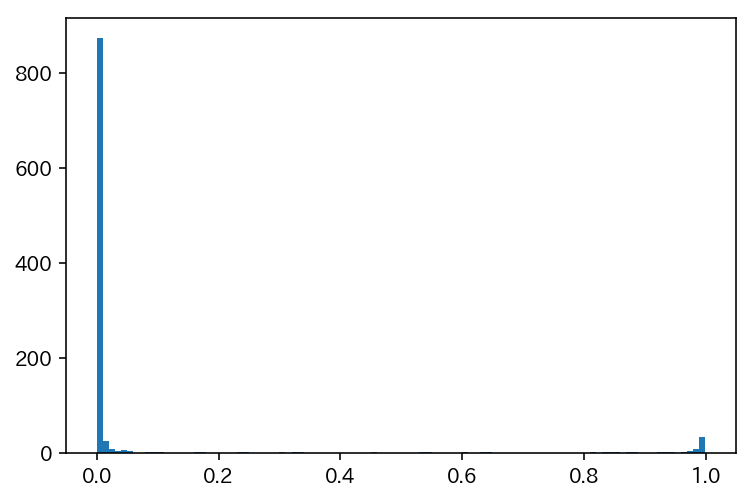

In [29]:
plt.hist(y_valid_pred, bins=100)
plt.show()

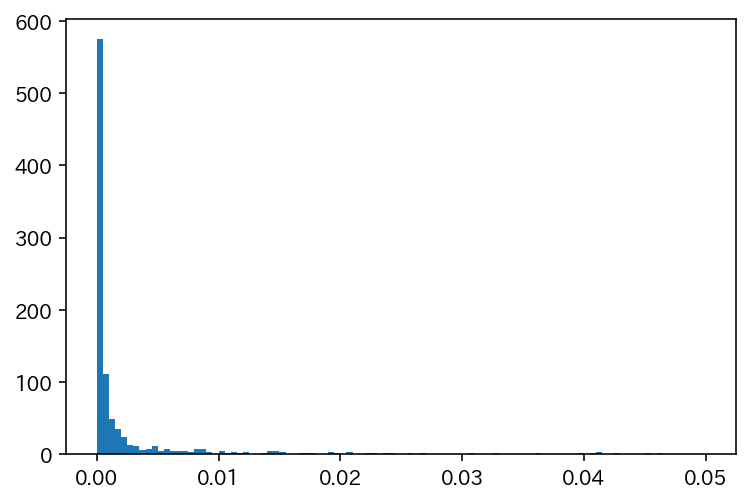

In [30]:
plt.hist(y_valid_pred, bins=100, range=(0, 0.05))
plt.show()

In [31]:
def evaluation(y_valid_pred, threshold):
    print("-"*30)
    print("threshold : " + str(threshold))
    print('acc : ' + str(accuracy_score(y_valid==0, (y_valid_pred)<threshold)))
    print('recall : ' + str(recall_score(y_valid==0, (y_valid_pred)<threshold)))
    print('precision : ' + str(precision_score(y_valid==0, (y_valid_pred)<threshold)))
    print('f1 : ' + str(f1_score(y_valid==0, (y_valid_pred)<threshold)))
    cm = confusion_matrix(y_valid==0, (y_valid_pred)<threshold)
    print(cm)
    return f1_score(y_valid==0, (y_valid_pred)<threshold)

In [48]:
f1_best = 0.0
threshold_best = 0.0
for threshold in range(0, 20):
    f1 = evaluation(y_valid_pred, threshold/100)
    if f1 > f1_best:
        f1_best = f1
        threshold_best = threshold/100
print("\n"+"*"*30)
print("best threshold : " + str(threshold_best))
print("best f1_score : " + str(f1_best))
print("*"*30)

------------------------------
threshold : 0.0
acc : 0.07645875251509054
recall : 0.0
precision : 0.0
f1 : 0.0
[[ 76   0]
 [918   0]]
------------------------------
threshold : 0.01
acc : 0.9517102615694165
recall : 0.94880174291939
precision : 0.9988532110091743
f1 : 0.9731843575418995
[[ 75   1]
 [ 47 871]]
------------------------------
threshold : 0.02
acc : 0.9728370221327968
recall : 0.9738562091503268
precision : 0.9966555183946488
f1 : 0.9851239669421488
[[ 73   3]
 [ 24 894]]
------------------------------
threshold : 0.03
acc : 0.9788732394366197
recall : 0.9814814814814815
precision : 0.9955801104972376
f1 : 0.988480526604498
[[ 72   4]
 [ 17 901]]
------------------------------
threshold : 0.04
acc : 0.9828973843058351
recall : 0.985838779956427
precision : 0.9955995599559956
f1 : 0.9906951286261632
[[ 72   4]
 [ 13 905]]
------------------------------
threshold : 0.05
acc : 0.9849094567404426
recall : 0.9901960784313726
precision : 0.9934426229508196
f1 : 0.991816693944353

In [63]:
importance = model.feature_importance(importance_type='gain')
importance = pd.DataFrame(importance, index=col_name, columns=['importance']).sort_values('importance', ascending=False)
importance = importance.iloc[0:100, :]

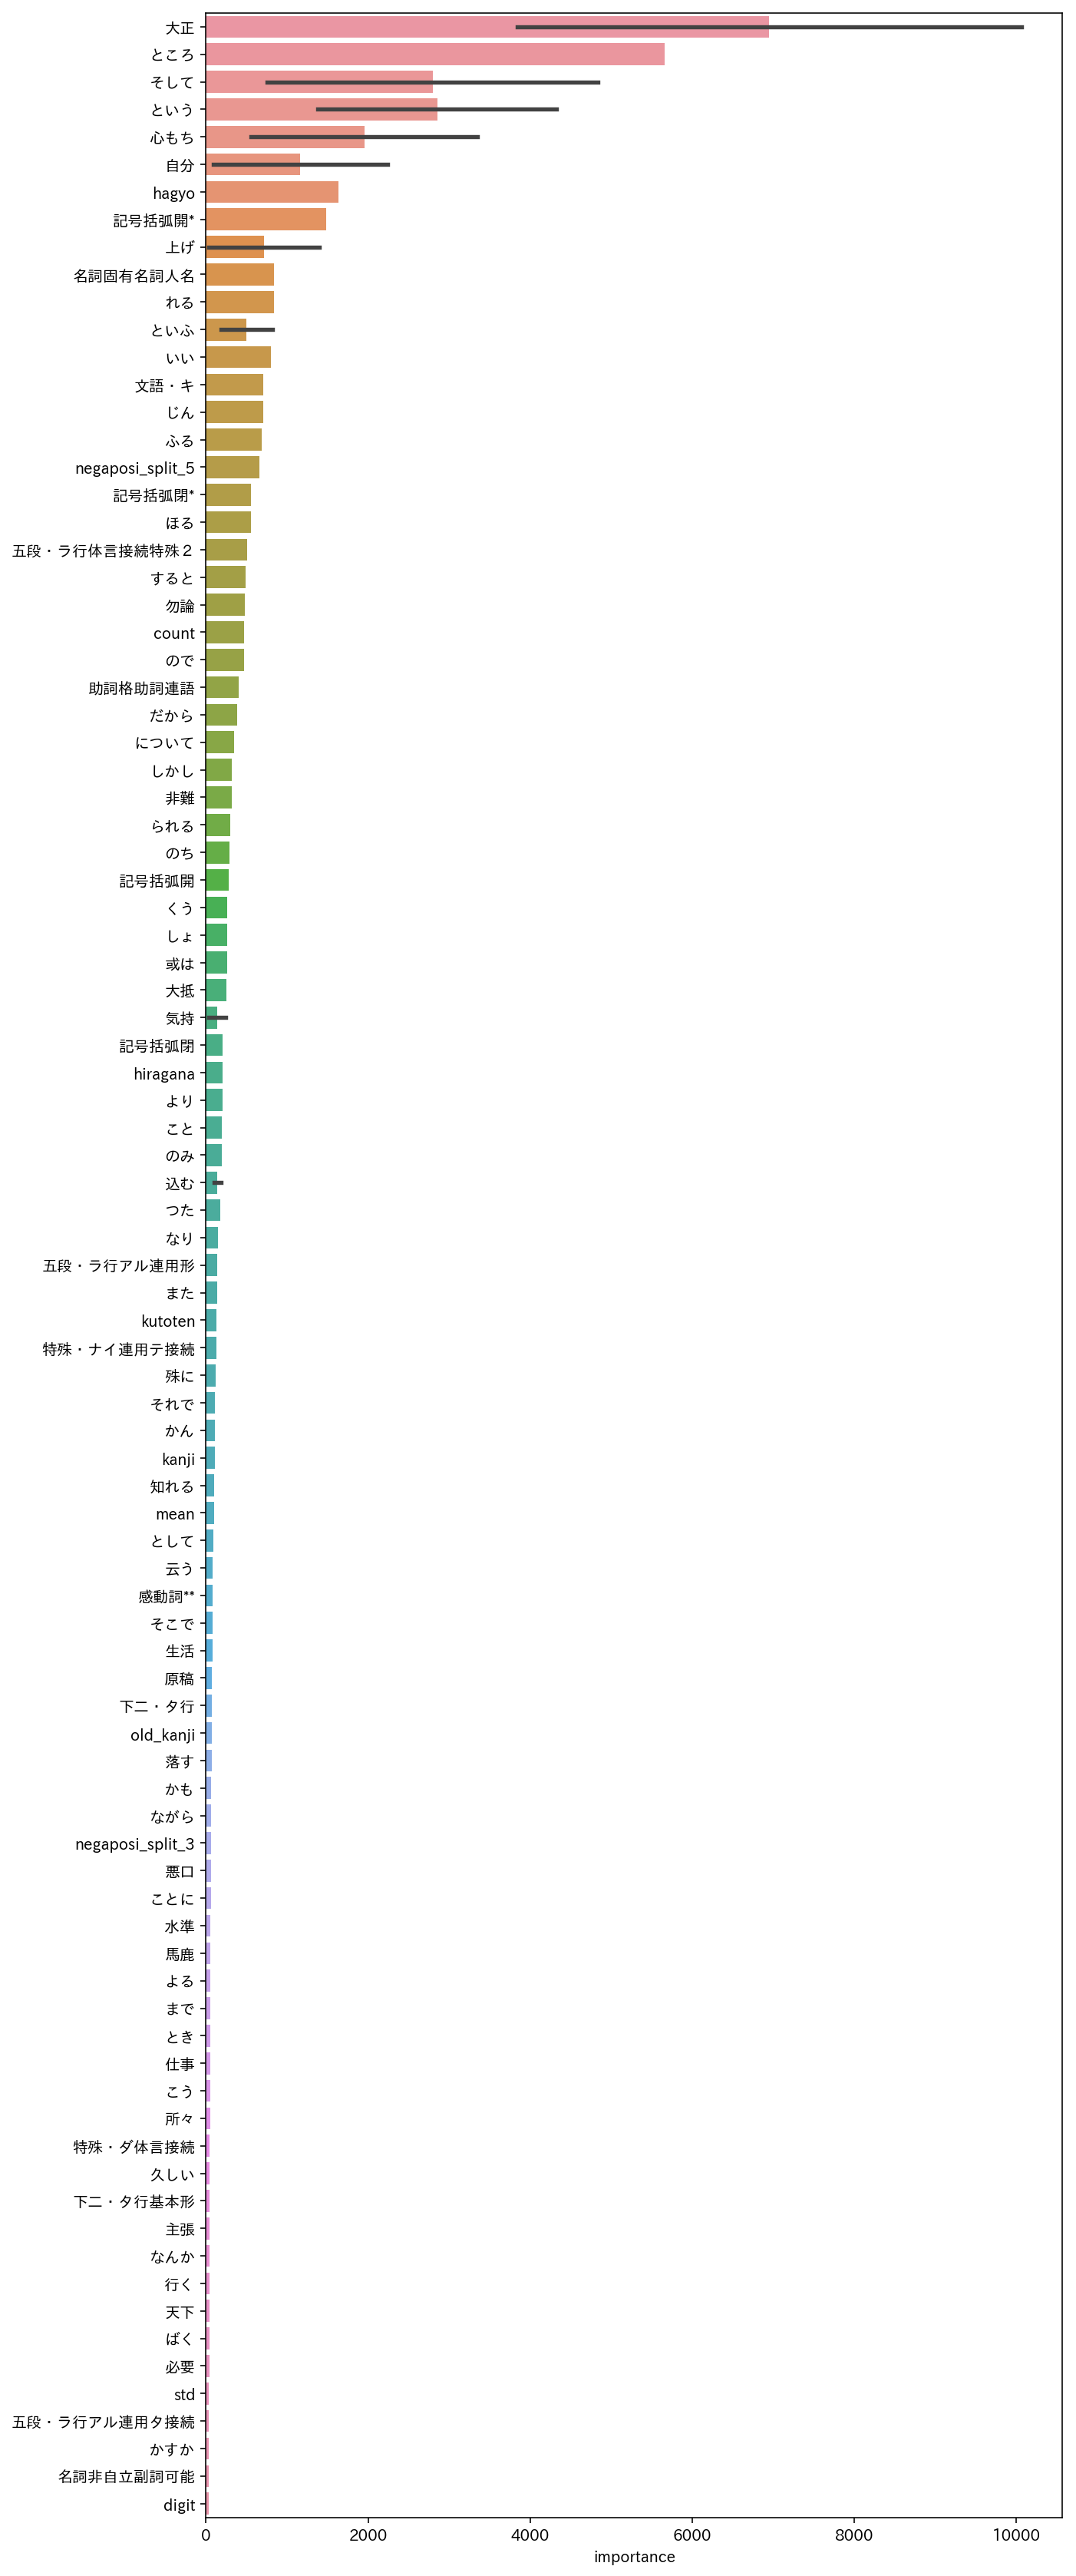

In [64]:
plt.figure(figsize=(10, 30))
sns.barplot(x = importance['importance'], y = importance.index)
plt.show()

In [65]:
importance = model.feature_importance(importance_type='split')
importance = pd.DataFrame(importance, index=col_name, columns=['importance']).sort_values('importance', ascending=False)
importance = importance.iloc[0:100, :]

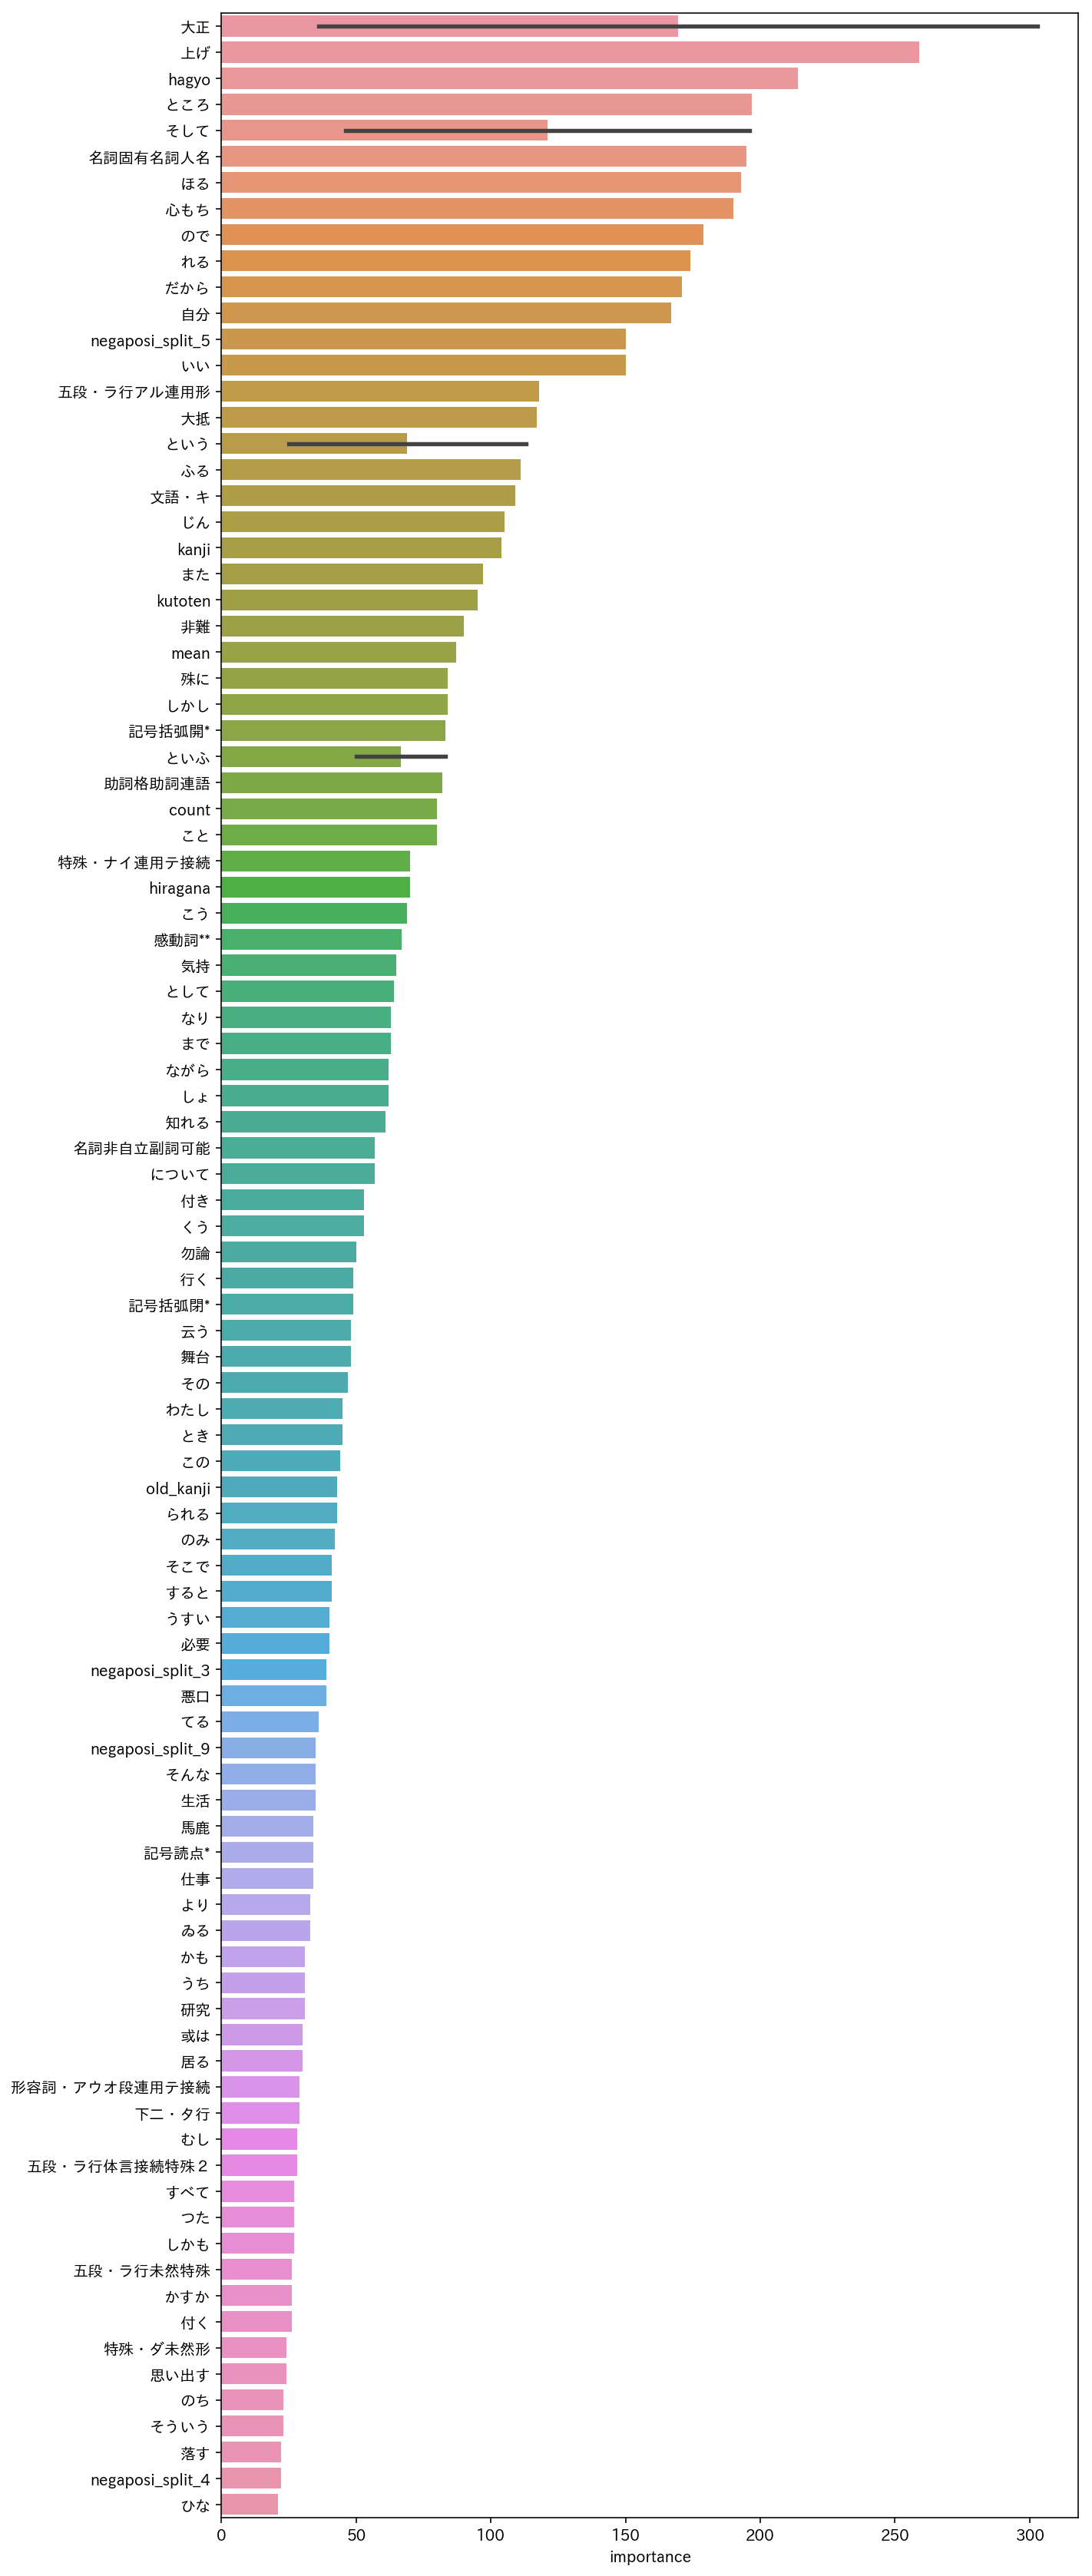

In [66]:
plt.figure(figsize=(10, 30))
sns.barplot(x = importance['importance'], y = importance.index)
plt.show()

In [37]:
y_test = model.predict(X_test)

In [38]:
y_test

array([4.46955770e-04, 3.00420902e-04, 1.23561402e-04, ...,
       7.17622397e-04, 6.27824298e-05, 4.13138257e-04])

In [39]:
len(y_test)

1420

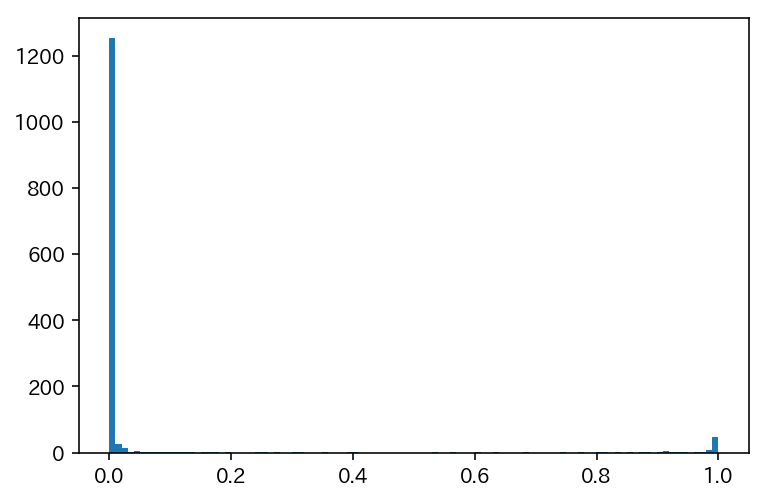

In [40]:
plt.hist(y_test, bins=100)
plt.show()

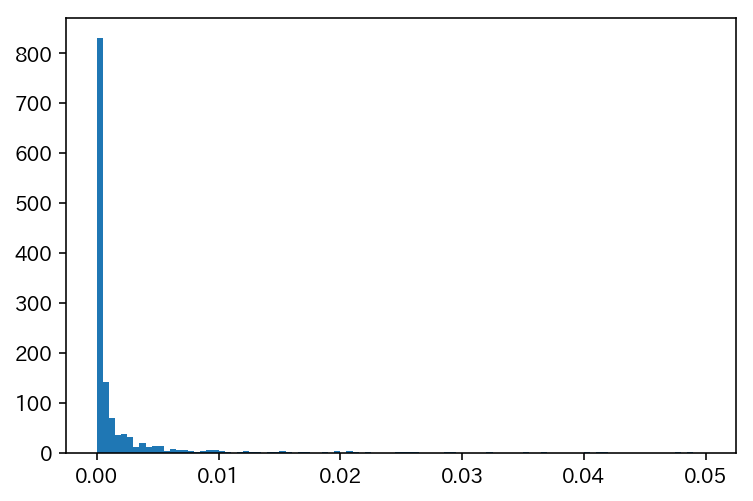

In [41]:
plt.hist(y_test, bins=100, range=(0, 0.05))
plt.show()

In [67]:
print("threshold_best : " + str(threshold_best))
print("akutagawa : " + str(sum((y_test > threshold_best)*1)))
print("not akutagawa : " + str(sum((y_test <= threshold_best)*1)))

threshold_best : 0.17
akutagawa : 100
not akutagawa : 1320


In [68]:
submit_sample = pd.read_csv("../input/sample_submission.csv", index_col=0)
submit_sample

,author
writing_id,
4,0
5,0
6,1
10,1
11,1
13,1
18,0
21,0
26,1


In [69]:
submit_sample["author"] = (y_test > threshold_best)*1
submit_sample

,author
writing_id,
4,0
5,0
6,0
10,0
11,0
13,0
18,0
21,0
26,0


In [70]:
submit_sample["author"].value_counts()[0]/(submit_sample["author"].value_counts()[0]+submit_sample["author"].value_counts()[1])

0.9295774647887324

In [71]:
y_train["target"].value_counts()[0]/(y_train["target"].value_counts()[0]+y_train["target"].value_counts()[1])

0.9240724762726489

In [72]:
submit_sample.to_csv("../input/submission_0112_2.csv")